In [10]:
# import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import plotly.express as px

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [13]:
# load the dataset
imdb_df = pd.read_csv('IMDB-Dataset-Sentiment-Analysis.csv')

In [14]:
imdb_df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [15]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [16]:
imdb_df.isna().sum()

text     0
label    0
dtype: int64

In [17]:
imdb_df.isnull().sum()

text     0
label    0
dtype: int64

In [17]:
imdb_df['label'].value_counts()

0    20019
1    19981
Name: label, dtype: int64

In [19]:
# PERFORM DATA CLEANING (REMOVE PUNCTUATIONS FROM TEXT)

In [18]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
def remove_punc(review):
    Text_punc_removed = [char for char in review if char not in string.punctuation]
    Text_punc_removed_join = ''.join(Text_punc_removed)
    return Text_punc_removed_join

In [20]:
imdb_df['Text Without Punctuation'] = imdb_df['text'].apply(remove_punc)

In [21]:
imdb_df

,text,label,Text Without Punctuation
0,I grew up (b. 1965) watching and loving the Th...,0,I grew up b 1965 watching and loving the Thund...
1,"When I put this movie in my DVD player, and sa...",0,When I put this movie in my DVD player and sat...
2,Why do people who do not know what a particula...,0,Why do people who do not know what a particula...
3,Even though I have great interest in Biblical ...,0,Even though I have great interest in Biblical ...
4,Im a die hard Dads Army fan and nothing will e...,1,Im a die hard Dads Army fan and nothing will e...
...,...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1,Western Union is something of a forgotten clas...
39996,This movie is an incredible piece of work. It ...,1,This movie is an incredible piece of work It e...
39997,My wife and I watched this movie because we pl...,0,My wife and I watched this movie because we pl...
39998,"When I first watched Flatliners, I was amazed....",1,When I first watched Flatliners I was amazed I...


In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year', 'https'])

In [25]:
# Remove stopwords and remove short words
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >= 2 and token not in stop_words:
            result.append(token)
            
    return result

In [26]:
imdb_df['Text Without Punc & Stopwords'] = imdb_df['Text Without Punctuation'].apply(preprocess)

In [27]:
imdb_df

,text,label,Text Without Punctuation,Text Without Punc & Stopwords
0,I grew up (b. 1965) watching and loving the Th...,0,I grew up b 1965 watching and loving the Thund...,"[grew, watching, loving, thunderbirds, mates, ..."
1,"When I put this movie in my DVD player, and sa...",0,When I put this movie in my DVD player and sat...,"[put, movie, dvd, player, sat, coke, chips, ex..."
2,Why do people who do not know what a particula...,0,Why do people who do not know what a particula...,"[people, know, particular, time, past, like, f..."
3,Even though I have great interest in Biblical ...,0,Even though I have great interest in Biblical ...,"[even, though, great, interest, biblical, movi..."
4,Im a die hard Dads Army fan and nothing will e...,1,Im a die hard Dads Army fan and nothing will e...,"[im, die, hard, dads, army, fan, nothing, ever..."
...,...,...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1,Western Union is something of a forgotten clas...,"[western, union, something, forgotten, classic..."
39996,This movie is an incredible piece of work. It ...,1,This movie is an incredible piece of work It e...,"[movie, incredible, piece, work, explores, eve..."
39997,My wife and I watched this movie because we pl...,0,My wife and I watched this movie because we pl...,"[wife, watched, movie, plan, visit, sicily, st..."
39998,"When I first watched Flatliners, I was amazed....",1,When I first watched Flatliners I was amazed I...,"[first, watched, flatliners, amazed, necessary..."


In [30]:
# Stemming of words

In [28]:
ps = PorterStemmer()
def stem(text):
    Text_stemmed = [ps.stem(char) for char in text]
    return Text_stemmed

In [29]:
imdb_df['Text Without Punc & Stopwords and stemmed'] = imdb_df['Text Without Punc & Stopwords'].apply(stem)

In [30]:
imdb_df

,text,label,Text Without Punctuation,Text Without Punc & Stopwords,Text Without Punc & Stopwords and stemmed
0,I grew up (b. 1965) watching and loving the Th...,0,I grew up b 1965 watching and loving the Thund...,"[grew, watching, loving, thunderbirds, mates, ...","[grew, watch, love, thunderbird, mate, school,..."
1,"When I put this movie in my DVD player, and sa...",0,When I put this movie in my DVD player and sat...,"[put, movie, dvd, player, sat, coke, chips, ex...","[put, movi, dvd, player, sat, coke, chip, expe..."
2,Why do people who do not know what a particula...,0,Why do people who do not know what a particula...,"[people, know, particular, time, past, like, f...","[peopl, know, particular, time, past, like, fe..."
3,Even though I have great interest in Biblical ...,0,Even though I have great interest in Biblical ...,"[even, though, great, interest, biblical, movi...","[even, though, great, interest, biblic, movi, ..."
4,Im a die hard Dads Army fan and nothing will e...,1,Im a die hard Dads Army fan and nothing will e...,"[im, die, hard, dads, army, fan, nothing, ever...","[im, die, hard, dad, armi, fan, noth, ever, ch..."
...,...,...,...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1,Western Union is something of a forgotten clas...,"[western, union, something, forgotten, classic...","[western, union, someth, forgotten, classic, w..."
39996,This movie is an incredible piece of work. It ...,1,This movie is an incredible piece of work It e...,"[movie, incredible, piece, work, explores, eve...","[movi, incred, piec, work, explor, everi, nook..."
39997,My wife and I watched this movie because we pl...,0,My wife and I watched this movie because we pl...,"[wife, watched, movie, plan, visit, sicily, st...","[wife, watch, movi, plan, visit, sicili, strom..."
39998,"When I first watched Flatliners, I was amazed....",1,When I first watched Flatliners I was amazed I...,"[first, watched, flatliners, amazed, necessary...","[first, watch, flatlin, amaz, necessari, featu..."


In [31]:
imdb_df['Text Without Punc & Stopwords and stemmed Joined'] = imdb_df['Text Without Punc & Stopwords and stemmed'].apply(lambda x: " ".join(x))

In [32]:
imdb_df['Text Without Punc & Stopwords and stemmed Joined'][0]

'grew watch love thunderbird mate school watch play thunderbird school lunch school want virgil scott one want alan count becam art form took children see movi hope would get glimps love child bitterli disappoint high point snappi theme tune could compar origin score thunderbird thank earli saturday morn one televis channel still play rerun seri gerri anderson wife creat jonatha frake hand director chair version complet hopeless wast film utter rubbish cgi remak may accept replac marionett homo sapien subsp sapien huge error judgment'

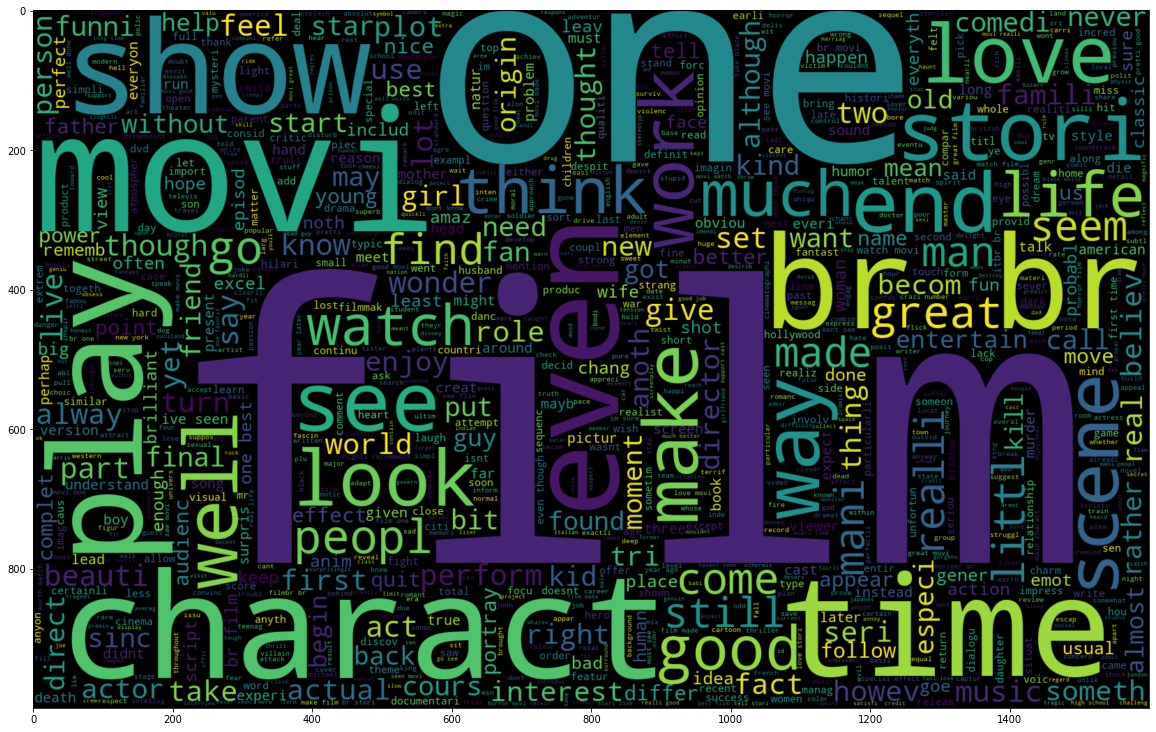

In [36]:
# Plot WORDCLOUD

plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 1000).generate(" ".join(imdb_df[imdb_df['label'] == 1]['Text Without Punc & Stopwords and stemmed Joined']))
plt.imshow(wc, interpolation = 'bilinear');

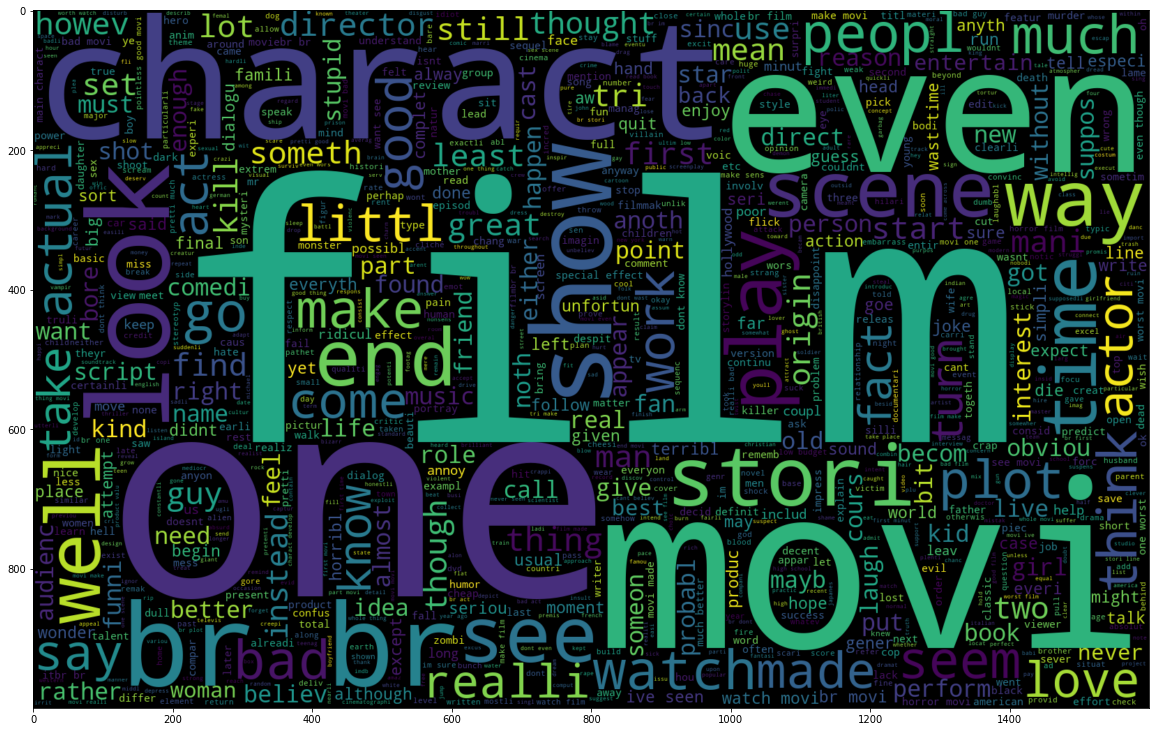

In [37]:
plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 1000).generate(" ".join(imdb_df[imdb_df['label'] == 0]['Text Without Punc & Stopwords and stemmed Joined']))
plt.imshow(wc, interpolation = 'bilinear');

In [38]:
# Obtain the maximum length of data in the document
# This will be later used when word embeddings are generated

In [33]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [34]:
maxlen = -1
for doc in imdb_df['Text Without Punc & Stopwords and stemmed Joined']:
    tokens = nltk.word_tokenize(doc)
    if(maxlen < len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is:", maxlen)

The maximum number of words in any document is: 1419


In [61]:
review_length = [ len(nltk.word_tokenize(x)) for x in imdb_df['Text Without Punc & Stopwords and stemmed Joined'] ]
review_length

[84,
 157,
 98,
 33,
 106,
 57,
 123,
 149,
 109,
 142,
 63,
 121,
 41,
 76,
 72,
 80,
 530,
 130,
 218,
 139,
 49,
 65,
 16,
 141,
 62,
 246,
 90,
 20,
 66,
 146,
 98,
 86,
 145,
 98,
 155,
 104,
 164,
 340,
 50,
 491,
 68,
 108,
 77,
 124,
 93,
 88,
 217,
 23,
 80,
 60,
 83,
 74,
 28,
 187,
 75,
 134,
 86,
 82,
 69,
 193,
 27,
 259,
 72,
 65,
 79,
 53,
 146,
 440,
 133,
 75,
 79,
 56,
 152,
 78,
 60,
 284,
 151,
 89,
 283,
 208,
 67,
 62,
 111,
 118,
 32,
 113,
 205,
 87,
 200,
 103,
 109,
 121,
 53,
 171,
 85,
 59,
 94,
 198,
 78,
 180]

In [35]:
imdb_df['review_length'] = [ len(nltk.word_tokenize(x)) for x in imdb_df['Text Without Punc & Stopwords and stemmed Joined'] ]

In [21]:
imdb_df

,text,label,Text Without Punctuation,Text Without Punc & Stopwords,Text Without Punc & Stopwords and stemmed,Text Without Punc & Stopwords and stemmed Joined,review_length
0,I grew up (b. 1965) watching and loving the Th...,0,I grew up b 1965 watching and loving the Thund...,"[grew, watching, loving, thunderbirds, mates, ...","[grew, watch, love, thunderbird, mate, school,...",grew watch love thunderbird mate school watch ...,84
1,"When I put this movie in my DVD player, and sa...",0,When I put this movie in my DVD player and sat...,"[put, movie, dvd, player, sat, coke, chips, ex...","[put, movi, dvd, player, sat, coke, chip, expe...",put movi dvd player sat coke chip expect hope ...,157
2,Why do people who do not know what a particula...,0,Why do people who do not know what a particula...,"[people, know, particular, time, past, like, f...","[peopl, know, particular, time, past, like, fe...",peopl know particular time past like feel need...,98
3,Even though I have great interest in Biblical ...,0,Even though I have great interest in Biblical ...,"[even, though, great, interest, biblical, movi...","[even, though, great, interest, biblic, movi, ...",even though great interest biblic movi bore de...,33
4,Im a die hard Dads Army fan and nothing will e...,1,Im a die hard Dads Army fan and nothing will e...,"[im, die, hard, dads, army, fan, nothing, ever...","[im, die, hard, dad, armi, fan, noth, ever, ch...",im die hard dad armi fan noth ever chang got t...,106
...,...,...,...,...,...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1,Western Union is something of a forgotten clas...,"[western, union, something, forgotten, classic...","[western, union, someth, forgotten, classic, w...",western union someth forgotten classic western...,291
39996,This movie is an incredible piece of work. It ...,1,This movie is an incredible piece of work It e...,"[movie, incredible, piece, work, explores, eve...","[movi, incred, piec, work, explor, everi, nook...",movi incred piec work explor everi nook cranni...,27
39997,My wife and I watched this movie because we pl...,0,My wife and I watched this movie because we pl...,"[wife, watched, movie, plan, visit, sicily, st...","[wife, watch, movi, plan, visit, sicili, strom...",wife watch movi plan visit sicili stromboli so...,99
39998,"When I first watched Flatliners, I was amazed....",1,When I first watched Flatliners I was amazed I...,"[first, watched, flatliners, amazed, necessary...","[first, watch, flatlin, amaz, necessari, featu...",first watch flatlin amaz necessari featur good...,93


In [133]:
# Plot the distribution for the number of words in a text
fig = px.histogram(x = review_length, nbins = 60)
fig.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



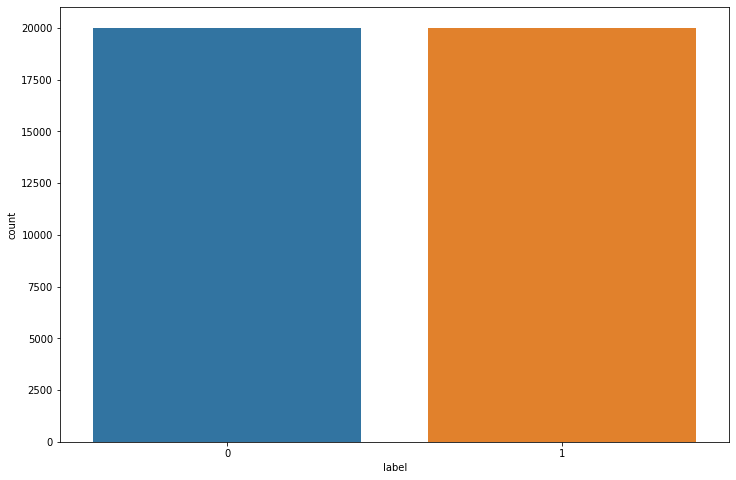

In [43]:
plt.figure(figsize=(12,8))
sns.countplot(imdb_df['label'])

In [44]:
# PREPARE THE DATA BY TOKENIZING AND PADDING

In [22]:
list_of_words = []
for i in imdb_df['Text Without Punc & Stopwords and stemmed']:
    for j in i:
        list_of_words.append(j)

In [23]:
# Obtain the total words present in the dataset
total_words = len(list(set(list_of_words)))

In [24]:
total_words

114888

In [48]:
# split the data into test and train 


In [49]:
X = imdb_df['Text Without Punc & Stopwords and stemmed']
y = imdb_df['label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [50]:
X_train.shape

(32000,)

In [51]:
X_test.shape

(8000,)

In [52]:
y_train.shape

(32000,)

In [53]:
y_test.shape

(8000,)

In [54]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words=total_words)
tokenizer.fit_on_texts(X_train)

In [55]:
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

In [56]:
# Add padding to training and testing data

In [57]:
padded_train = pad_sequences(train_sequences, maxlen = 100, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 100, truncating = 'post')

In [58]:
for i, doc in enumerate(padded_train[:3]):
     print("The padded encoding for document:", i+1," is:", doc)

The padded encoding for document: 1  is: [    2  1551   192   195    29   125    64    71  1551   192    15   117
    35    37  9206 25104    31  3286  4039   221   210   287    11   159
  9833   721   307   146   192   933    84    47   176   263 14174  1032
   146    67 13659   161   121  3125  3548   516  4124  1735   516   470
   233  1498 14174   373  4463   470   848  3764     8   523  2357   149
  1137  3434     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
The padded encoding for document: 2  is: [  161   181     2     6    13 15479 15480    38   318  1992   484     2
    94   294   315  2056   254  2358  2056   465    50  2444   595   333
  2606    29  2358     4    17     2   100   112   261   618   294  1178
  2453    74    45  5009    65     7   112     2   981   778  7765   694
  2637  2530   9

In [59]:
# Convert the data to categorical 2D representation
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

In [60]:
y_train_cat.shape

(32000, 2)

In [61]:
y_test_cat.shape

(8000, 2)

In [62]:
# BUILDING A DEEP NEURAL NETWORK WITH LSTM TO PERFORM SENTIMENT ANALYSIS

In [63]:
model = Sequential()

In [64]:
# Embedding layer 
model.add(Embedding(total_words, output_dim=64))

In [65]:
# LSTM and Dense layer
model.add(LSTM(32))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          7352832   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 7,366,370
Trainable params: 7,366,370
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.fit(padded_train, y_train_cat, batch_size = 256, validation_data=(padded_test, y_test_cat), epochs = 3)

Epoch 1/3
125/125 [==============================] - 22s 179ms/step - loss: 0.5824 - acc: 0.6578 - val_loss: 0.4087 - val_acc: 0.8300
Epoch 2/3
125/125 [==============================] - 22s 178ms/step - loss: 0.2743 - acc: 0.8940 - val_loss: 0.3229 - val_acc: 0.8583
Epoch 3/3
125/125 [==============================] - 22s 180ms/step - loss: 0.1475 - acc: 0.9503 - val_loss: 0.3482 - val_acc: 0.8574


In [67]:
# make prediction
pred = model.predict(padded_test)

In [68]:
# make prediction
prediction = []
for i in pred:
  prediction.append(np.argmax(i))

In [69]:
# list containing original values
original = []
for i in y_test_cat:
  original.append(np.argmax(i))

In [87]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, prediction)
accuracy

0.857375

In [88]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(original, prediction)

In [89]:
cm

array([[3275,  744],
       [ 397, 3584]])

In [90]:
from sklearn.metrics import classification_report
print(classification_report(original, prediction))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      4019
           1       0.83      0.90      0.86      3981

    accuracy                           0.86      8000
   macro avg       0.86      0.86      0.86      8000
weighted avg       0.86      0.86      0.86      8000



In [112]:
# Single prediction
single_padded_test = padded_test[5000].reshape(1,-1)

In [113]:
single_padded_test.shape

(1, 100)

In [114]:
padded_test.shape

(8000, 100)

In [115]:
single_pred = model.predict(single_padded_test)

In [124]:
y_test_cat.shape

(8000, 2)

In [122]:
y_test_cat_single = y_test_cat[5000].reshape(1,-1)

In [123]:
y_test_cat_single.shape

(1, 2)

In [117]:
single_prediction = []
for i in single_pred:
  single_prediction.append(np.argmax(i))

In [118]:
single_prediction

[0]

In [125]:
# Actual result(label)
single_original = []
for i in y_test_cat_single:
  single_original.append(np.argmax(i))

In [126]:
single_original

[0]

### **Sentiment Analysis using a pre-trained Transformer model**

In [36]:
!pip install transformers

     |████████████████████████████████| 1.3MB 2.6MB/s 
     |████████████████████████████████| 2.9MB 40.3MB/s 
     |████████████████████████████████| 890kB 45.6MB/s 
     |████████████████████████████████| 1.1MB 38.6MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=ccddefc38075dc99698f2a18ca47fec5a6563f4aae55ac75d91ae6811776add4
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [37]:
from transformers import pipeline
nlp = pipeline('sentiment-analysis')

In [38]:
X = imdb_df[imdb_df['review_length'] < 100]['Text Without Punc & Stopwords and stemmed Joined']
y = imdb_df[imdb_df['review_length'] < 100]['label']

In [39]:
X.shape

(22485,)

In [40]:
y.shape

(22485,)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.02)

In [42]:
X_test.shape

(450,)

In [43]:
y_test.shape

(450,)

In [90]:
type(X_test)

pandas.core.series.Series

In [44]:
X_test_list = list(X_test)

In [45]:
type(X_test_list)

list

In [46]:
pred = nlp(X_test_list)

In [47]:
type(pred)

list

In [48]:
pred_df = pd.DataFrame(pred)

In [50]:
pred_df

,label,score
0,NEGATIVE,0.971000
1,NEGATIVE,0.989744
2,POSITIVE,0.976261
3,NEGATIVE,0.991156
4,NEGATIVE,0.945612
...,...,...
445,NEGATIVE,0.996272
446,NEGATIVE,0.988723
447,NEGATIVE,0.999172
448,NEGATIVE,0.998087


In [51]:
pred_df['pred_sentiment'] = 0

In [52]:
pred_df['pred_sentiment']

0      0
1      0
2      0
3      0
4      0
      ..
445    0
446    0
447    0
448    0
449    0
Name: pred_sentiment, Length: 450, dtype: int64

In [53]:
pred_df['pred_sentiment'][pred_df['label'] == 'POSITIVE'] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
pred_df.head(20)

,label,score,pred_sentiment
0,NEGATIVE,0.971000,0
1,NEGATIVE,0.989744,0
2,POSITIVE,0.976261,1
3,NEGATIVE,0.991156,0
4,NEGATIVE,0.945612,0
5,POSITIVE,0.999453,1
6,NEGATIVE,0.980531,0
7,NEGATIVE,0.984147,0
8,NEGATIVE,0.998810,0
9,NEGATIVE,0.999646,0


In [55]:
y_test_cat = to_categorical(y_test, 2)

In [56]:
y_test_cat.shape

(450, 2)

In [57]:
original = []
for i in y_test_cat:
  original.append(np.argmax(i))

In [58]:
original

[1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,


In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [60]:
cm = confusion_matrix(original, pred_df['pred_sentiment'].values)
cm

array([[237,   8],
       [113,  92]])

In [61]:
from sklearn.metrics import classification_report
print(classification_report(original, pred_df['pred_sentiment'].values))

              precision    recall  f1-score   support

           0       0.68      0.97      0.80       245
           1       0.92      0.45      0.60       205

    accuracy                           0.73       450
   macro avg       0.80      0.71      0.70       450
weighted avg       0.79      0.73      0.71       450

